In [32]:
import tweepy
import pandas as pd

In [46]:
auth = tweepy.OAuthHandler("BCT3FO5dvcED8cyJYZYYz55AO", "yzznx5RFvaqjqaxnubcMWL4RPutJyRzTwu85jpqRUlykhc0dJL")
auth.set_access_token("1384514435385937926-otVjXRjJyXvNKzQ77dfG6JPTIGh0gi", "nC9aoc6woTL21fHd3fzrWbJLGPFN2Z0clbCfSqlIMrNRi")
api = tweepy.API(auth)

In [51]:
cursor = tweepy.Cursor(api.search, since='2020-4-25',lang="en",q="covid", tweet_mode="extended")

In [52]:
for i in cursor.items(100):
    print(i.full_text)
    break

RT @ASlavitt: Important statement regarding support for India in combatting COVID-19. https://t.co/BMblXBkSIE


In [3]:
no = 10
df = {"tweets":[],"likes":[],"time":[]}

for i in tweepy.Cursor(api.search, q="Covid", tweet_mode="extended").items(100):
    df['tweets'].append(i.full_text)
    df['likes'].append(i.favorite_count)
    df['time'].append(i.created_at)
    

In [4]:
df = pd.DataFrame(df)
df = df[~df.tweets.str.contains("RT")] # remove retweets
df = df.reset_index(drop=True)

In [5]:
df

,tweets,likes,time
0,"Covid: Tokyo verso stato emergenza, a tre mesi...",0,2021-04-22 09:46:33
1,@oremforever Hata wewe unafanya PR na Covid......,0,2021-04-22 09:46:33
2,"Malgré le Covid-19, les Brit Awards se tiendro...",0,2021-04-22 09:46:33
3,We are not ready to writing exam in covid 19 ...,0,2021-04-22 09:46:33
4,@asanyfuleno @AngelaRayner @MsMelanieSykes Sev...,0,2021-04-22 09:46:32
5,"El síndic major, en la inauguració de la 12a J...",0,2021-04-22 09:46:32
6,@Ragusaecomites @TinaRiepe Yikes! 🙀 That list ...,0,2021-04-22 09:46:32
7,"Di kantor saya, ada pimpinan unit kerja mence...",0,2021-04-22 09:46:31
8,#WhoFailedIndia I think we shud stand &amp; su...,1,2021-04-22 09:46:31
9,"“For the first time since the pandemic began, ...",0,2021-04-22 09:46:30


In [6]:
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [10]:
nlp = spacy.load('en_core_web_sm')

In [14]:
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [18]:
lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]
lines2 = []

for word in lines:
    if word !='':
        lines2.append(word)

In [21]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem =[]
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [23]:
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

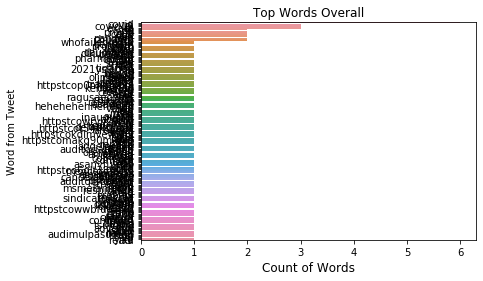

In [31]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()

sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize = 12)
plt.show()